In [1]:
# Inserting Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\deban\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Loading Dataset
netflix_data = pd.read_csv('netflix_titles_2021.csv')

In [3]:
# Exploring Dataset
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Data Cleaning and Preparation

# Checking for missing values in the dataset
missing_values = netflix_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [5]:
# Handling missing values function
def handle_missing_values(data):
    # Replacing missing values in 'director' and 'cast' columns with 'Unknown'
    data['director'].fillna('Unknown', inplace=True)
    data['cast'].fillna('Unknown', inplace=True)

    # Filling missing values in 'country' with 'Unknown'
    data['country'].fillna('Unknown', inplace=True)

    # Dropping rows with missing 'date_added' values
    data.dropna(subset=['date_added'], inplace=True)

    # Filling missing values in 'rating' with the most common rating (mode)
    data['rating'].fillna(data['rating'].mode()[0], inplace=True)

    # Filling missing 'duration' with 'Unknown'
    data['duration'].fillna('Unknown', inplace=True)

    return data

# Applying function to handle missing values
netflix_data = handle_missing_values(netflix_data)

# Verifying that there are no missing values left
print("Missing values per column after handling:\n", netflix_data.isnull().sum())

Missing values per column after handling:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


C:\Users\deban\AppData\Local\Temp\ipykernel_24088\1124469592.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['director'].fillna('Unknown', inplace=True)
C:\Users\deban\AppData\Local\Temp\ipykernel_24088\1124469592.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

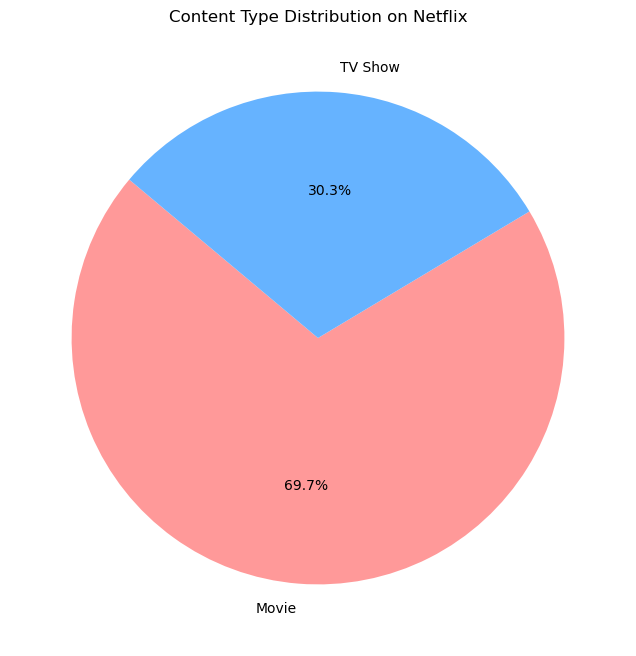

In [6]:
# Functioning to plot a pie chart for content type distribution with percentages
def plot_content_type_pie_chart(data):
    # Calculate the count for each type
    content_counts = data['type'].value_counts()
    
    # Plotting the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(content_counts, labels=content_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
    plt.title("Content Type Distribution on Netflix")
    plt.show()

# Calling the function to plot
plot_content_type_pie_chart(netflix_data)

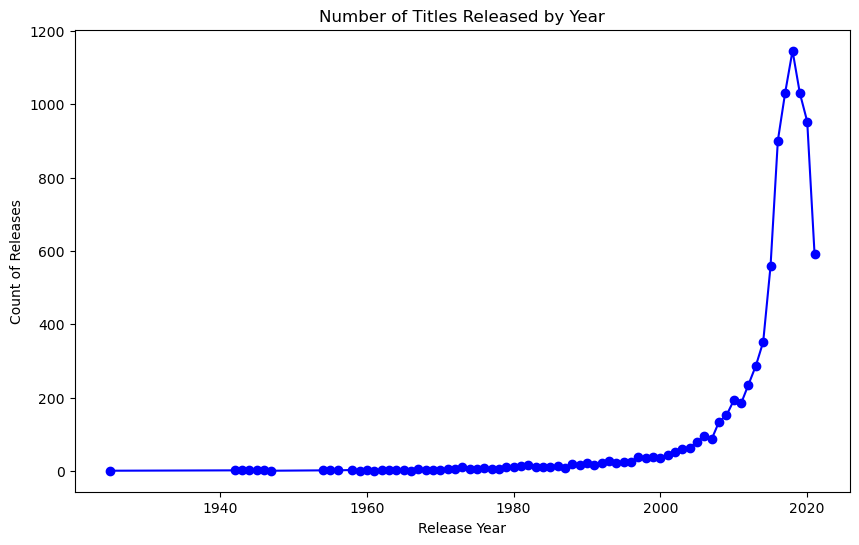

In [7]:
# Functioning to plot a line chart for content added per year
def plot_content_by_year(data):
    plt.figure(figsize=(10, 6))
    content_by_year = data['release_year'].value_counts().sort_index()
    plt.plot(content_by_year.index, content_by_year.values, marker='o', color='b')
    plt.title("Number of Titles Released by Year")
    plt.xlabel("Release Year")
    plt.ylabel("Count of Releases")
    plt.show()

plot_content_by_year(netflix_data)

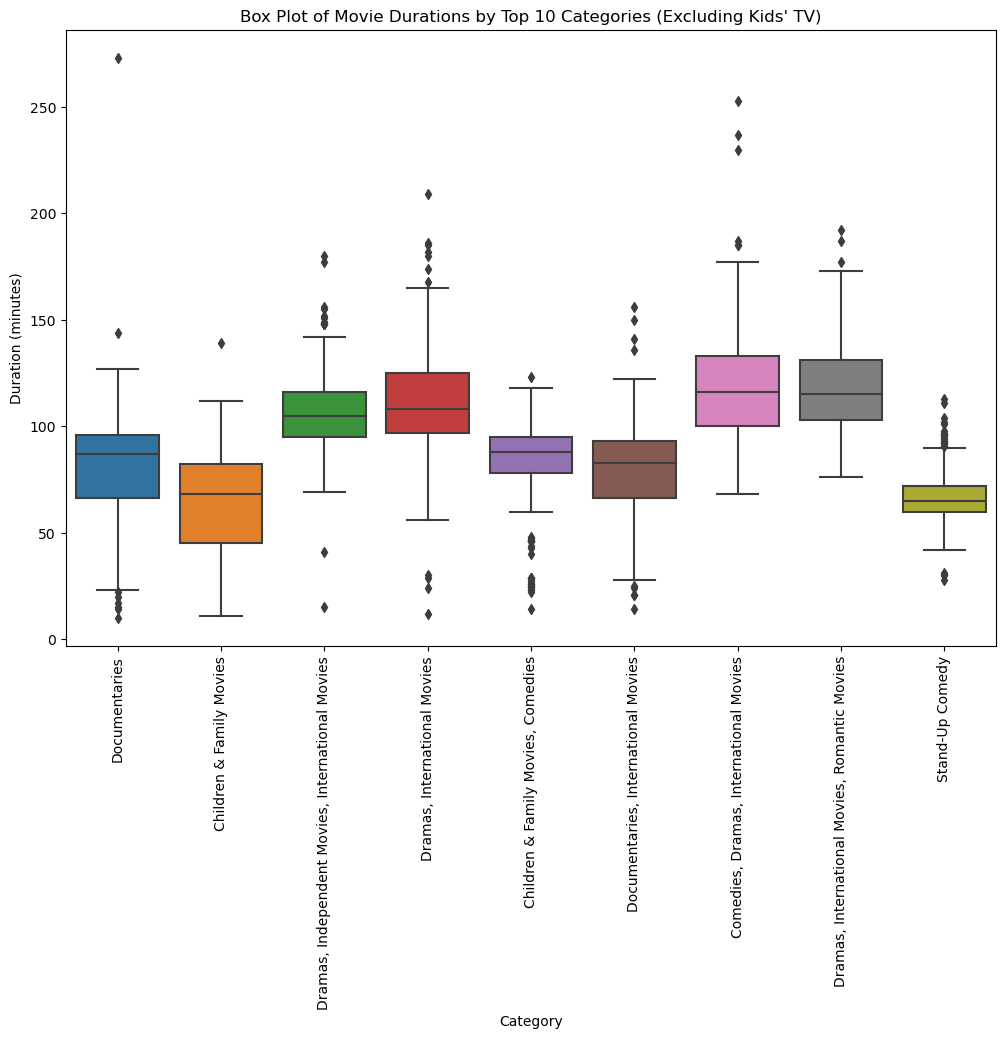

In [8]:
# Preprocessing the 'duration' column to create 'duration_minutes' as a numeric field
def preprocess_duration(data):
    # Create a new column for numeric duration in minutes
    data['duration_minutes'] = data['duration'].apply(lambda x: int(x.split()[0]) if 'min' in x else np.nan)
    return data

# Applying the preprocessing function
netflix_data = preprocess_duration(netflix_data)

# Finding the top 10 most common categories in the 'listed_in' column
top_10_categories = netflix_data['listed_in'].value_counts().nlargest(10).index
top_10_categories = top_10_categories[top_10_categories != "Kids' TV"]

# Filtering the dataset to only include rows with these updated top 10 categories
top_10_listed_in_data = netflix_data[netflix_data['listed_in'].isin(top_10_categories)]

# Functioning to create a box plot for movie durations by top 10 categories
def plot_top_10_categories_box(data):
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=data, x='listed_in', y='duration_minutes')
    plt.xticks(rotation=90)  
    plt.title("Box Plot of Movie Durations by Top 10 Categories (Excluding Kids' TV)")
    plt.xlabel("Category")
    plt.ylabel("Duration (minutes)")
    plt.show()

# Calling the function to plot
plot_top_10_categories_box(top_10_listed_in_data)

In [9]:
# Displaying descriptive statistics
netflix_data.describe() 

,release_year,duration_minutes
count,8797.000000,6128.000000
mean,2014.183472,99.577187
std,8.822191,28.290593
min,1925.000000,3.000000
25%,2013.000000,87.000000
50%,2017.000000,98.000000
75%,2019.000000,114.000000
max,2021.000000,312.000000
